In [141]:
%config Completer.use_jedi = False

In [142]:
import matplotlib.pyplot as plt # Import the Matplotlib package
from osgeo import gdal # Import the GDAL library
import numpy as np
from mpl_toolkits.basemap import Basemap

In [143]:
# Read the GRIB file
grib = gdal.Open('Datos/20_18/GFS_2021032018+006.grib2')

In [144]:
# Read an specific band
band = grib.GetRasterBand(99)

In [145]:
# Read the band as a Python array
data = band.ReadAsArray()

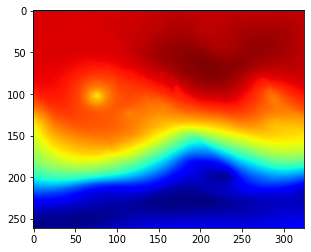

In [146]:
# Show the image
plt.imshow(data, cmap='jet')

In [147]:
band = grib.GetRasterBand(99)
metadata = band.GetMetadata()
band_name = metadata['GRIB_COMMENT']
band_description = band.GetDescription()
print(band_name)
print(band_description)
print(metadata)

Geopotential height [gpm]
50000[Pa] ISBL="Isobaric surface"
{'GRIB_COMMENT': 'Geopotential height [gpm]', 'GRIB_DISCIPLINE': '0(Meteorological)', 'GRIB_ELEMENT': 'HGT', 'GRIB_FORECAST_SECONDS': '21600 sec', 'GRIB_IDS': 'CENTER=7(US-NCEP) SUBCENTER=0 MASTER_TABLE=2 LOCAL_TABLE=1 SIGNF_REF_TIME=1(Start_of_Forecast) REF_TIME=2021-03-20T18:00:00Z PROD_STATUS=0(Operational) TYPE=1(Forecast)', 'GRIB_PDS_PDTN': '0', 'GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES': '3 5 2 0 96 0 0 1 6 100 0 50000 255 0 0', 'GRIB_PDS_TEMPLATE_NUMBERS': '3 5 2 0 96 0 0 0 1 0 0 0 6 100 0 0 0 195 80 255 0 0 0 0 0', 'GRIB_REF_TIME': '  1616263200 sec UTC', 'GRIB_SHORT_NAME': '50000-ISBL', 'GRIB_UNIT': '[gpm]', 'GRIB_VALID_TIME': '  1616284800 sec UTC'}


In [152]:
# Choose the visualization extent (min lon, min lat, max lon, max lat)
#extent = [-96.0, -75.0, -15.0, -10.0]
extent = [-65.0, -35.0, -61.0, -30.0]
min_lon = extent[0]; max_lon = extent[2]; min_lat = extent[1]; max_lat = extent[3]

In [153]:
#Esta celda utilizarla cuando tengamos un mapa definido
#==============================================================================
# Plotting the data
#==============================================================================
# Create the basemap reference for the Rectangular Projection
bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)
 
# Draw the country
bmap.readshapefile('/home/joaquin/Imagenes/mapa','BRA_adm1',linewidth=0.50,color='white')
bmap.readshapefile('/home/joaquin/Imagenes/mapa','ne_10m_admin_0_countries',linewidth=0.50,color='white')
 
# Draw parallels and meridians
bmap.drawparallels(np.arange(-90.0, 90.0, 5.0), linewidth=0.3, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=7)
bmap.drawmeridians(np.arange(0.0, 360.0, 5.0), linewidth=0.3, dashes=[4, 4], color='white', labels=[True,False,False,True], fmt='%g', labelstyle="+/-", size=7)
 
# Plot the model information
bmap.imshow(data, origin='upper', cmap='jet')


OSError: cannot locate /home/joaquin/Imagenes/mapa.shp

<a list of 38 text.Text objects>

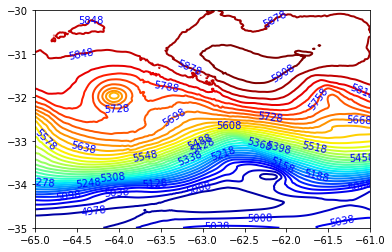

In [154]:
# Evenly spacing latitudes and longitudes over a specified interval (n° of lines and columns)
x = np.linspace(min_lon, max_lon, data.shape[1])
y = np.linspace(max_lat, min_lat, data.shape[0])
 
# Create the rectangular grid
xx, yy = np.meshgrid(x, y)
 
# Define de contour interval
data_min = np.min(data)
data_max = np.max(data)
interval = 30
levels = np.arange(data_min,data_max,interval)
 
# Plot the contour
S1 = plt.contour(xx, yy, data, alpha = 1, linewidths = 2.0, cmap='jet', levels=levels)
 
# Plot the contour labels
plt.clabel(S1,inline= 0,inline_spacing= 0,fontsize= 10,fmt= '%1.0f',colors= 'blue')


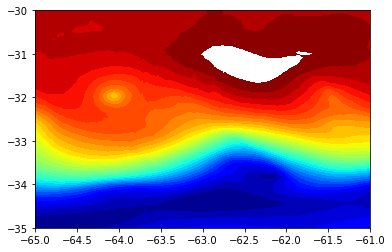

In [155]:
# Plot the filled contour
S1 = plt.contourf(xx, yy, data, alpha = 1.0, cmap='jet', levels=levels)